# Geospatial Clustering/Zoning

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import h3pandas
from h3 import h3_to_geo
import folium
from libpysal.weights import Queen, KNN
from esda.moran import Moran
import sys
import seaborn
import matplotlib.pyplot as plt

In [2]:

from sklearn.metrics.pairwise import haversine_distances

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

In [4]:
df = pd.read_csv('../../../h3_PLUTO.csv', low_memory=False)



In [5]:
df.columns

Index(['Unnamed: 0', 'Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020',
       'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp',
       'PolicePrct', 'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr',
       'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3',
       'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3',
       'LtdHeight', 'SplitZone', 'BldgClass', 'LandUse', 'Easements',
       'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea',
       'OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext',
       'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand',
       'AssessTot', 'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2',
       'HistDist', 'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR',
       'BoroCode', 'BBL', 'Con

In [6]:
# gdf = gpd.GeoDataFrame(df)
df_gb = df.groupby('h3_10').agg({'BldgArea': 'sum', 'YearBuilt': 'mean', 'AssessTot': 'max', 'ResArea': 'sum'})
df_gb = df_gb[df_gb['YearBuilt'] > 1500]

df_gb = df_gb.reset_index()
# # bk_hex_list = pd.read_csv('../../data/clean/h3_index/manhattan_hex.csv')
#
# # df_gb = bk_hex_list.join(df_gb, how='inner', on='manhattan_hex')
#
df2 = pd.DataFrame(df_gb['h3_10'])
# print(df2)
df_gb['lat'], df_gb['lon'] = zip(*df2['h3_10'].apply(h3_to_geo))
# # df2['h3_10'].apply(h3_to_geo)
#
df_gb.columns

Index(['h3_10', 'BldgArea', 'YearBuilt', 'AssessTot', 'ResArea', 'lat', 'lon'], dtype='object')

In [7]:

cluster_variables = ['BldgArea', 'YearBuilt', 'AssessTot', 'ResArea'

                     ]

# bk_hex_list

In [8]:
hex_files = ('bronx_hex.csv', 'brooklyn_hex.csv', 'manhattan_hex.csv', 'queens_hex.csv', 'staten_hex.csv')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

In [10]:
df_map = df_gb

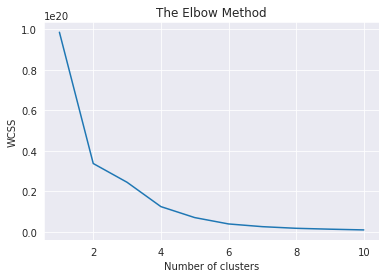

array([[1.94750000e+03, 5.20200000e+04, 4.45600000e+03],
       [1.93250000e+03, 8.23500000e+04, 3.96000000e+02],
       [1.86273913e+03, 7.65000000e+04, 3.72330000e+04],
       ...,
       [1.59610000e+03, 1.27215000e+06, 1.06922000e+05],
       [1.92000000e+03, 4.23315000e+06, 0.00000000e+00],
       [1.95850000e+03, 2.02230000e+06, 0.00000000e+00]])

In [37]:
#1.1 data preparation
X = df_map.iloc[:, 1:4].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
X

In [12]:
# 1.2 Training the K-Means model regarding to your elbow method or business logic groups
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
# 1.3 map data back to df
df_map['cluster'] = y_kmeans + 1  # to step up to group 1 to 4

In [13]:
df_map = df_map.set_index('h3_10')
w = Queen.from_dataframe(df_map.h3.h3_to_geo_boundary().reset_index())


/home/thowe/anaconda3/envs/plz-gpu/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 355 disconnected components.
 There are 266 islands with ids: 42, 91, 279, 314, 693, 696, 699, 824, 849, 995, 1117, 1164, 1188, 1189, 1216, 1299, 1300, 1555, 1556, 1557, 1561, 1579, 1581, 1665, 1701, 1716, 1788, 1815, 1889, 1891, 1892, 1908, 1928, 1986, 2064, 2379, 2578, 2642, 2655, 3274, 3285, 3587, 3588, 3645, 3946, 3958, 4087, 4333, 4418, 4440, 4450, 4729, 5155, 5162, 6812, 6910, 7060, 7255, 7972, 8212, 8291, 8579, 8883, 8886, 9246, 9270, 9308, 9502, 9503, 9619, 9627, 9826, 9828, 10458, 11330, 11381, 11581, 12065, 12307, 12313, 12318, 12368, 12409, 12415, 12466, 12472, 12473, 12492, 12540, 12816, 13190, 13240, 13259, 13309, 13310, 13315, 13398, 13673, 15073, 15859, 15920, 16382, 16386, 16521, 16558, 16564, 16637, 16716, 16740, 16763, 17589, 17707, 18529, 19038, 19176, 19688, 19707, 20021, 20608, 20610, 20613, 20614, 20615

In [14]:
clean = df_map.h3.h3_to_geo_boundary().reset_index().drop(w.islands)
w2 = Queen.from_dataframe(clean)


/home/thowe/anaconda3/envs/plz-gpu/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 89 disconnected components.
  warnings.warn(message)


In [15]:
np.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [Moran(clean[variable], w2) for variable in cluster_variables]
# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim) for variable, res in zip(cluster_variables, mi_results)
    ]
# Display on table
table = pd.DataFrame(
    mi_results,
    columns=['Variable', "Moran's I", 'P-value']
    ).set_index('Variable')
table

,Moran's I,P-value
Variable,,
BldgArea,0.551777,0.001
YearBuilt,0.234865,0.001
AssessTot,0.409780,0.001
ResArea,0.431972,0.001


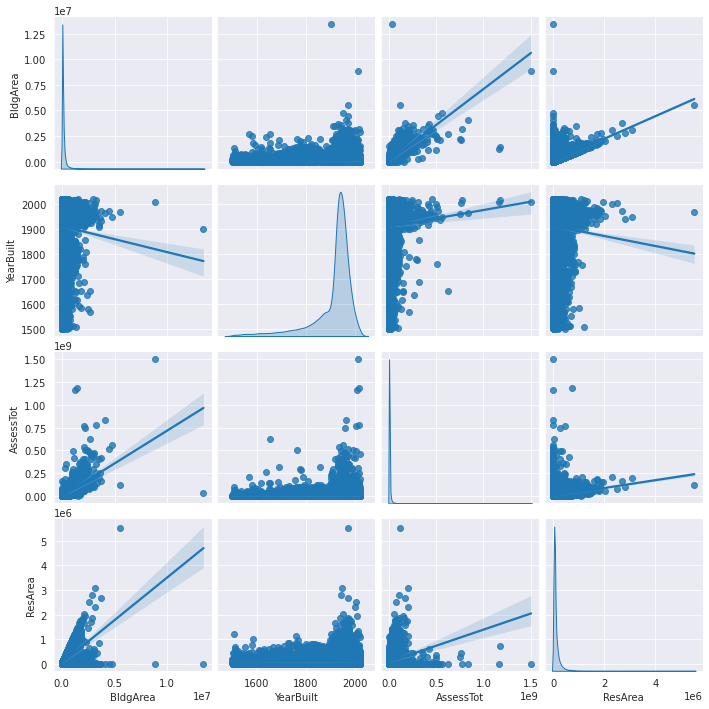

In [16]:
_ = seaborn.pairplot(clean[cluster_variables], kind='reg', diag_kind='kde')

In [29]:
from sklearn.preprocessing import robust_scale

db_scaled = robust_scale(clean[cluster_variables])

In [30]:
# # Initialise KMeans instance
from sklearn.cluster import AgglomerativeClustering
# from h3 import h3_indexes_are_neighbors

In [26]:
# import h3
#
# connie = np.zeros((len(s), len(s)))
# # connie_dict =
# thelen = len(s)
# for i in range(0, thelen):
#     connie[i, :] = [x in h3.k_ring(s[1]) for x in s]
#     connie[i, i] = 1
#     if i % 100 == 0:
#         print(i)
# #
#
#
# # Initialise
# # KMeans
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=12)

clean.set_index('h3_10')

,BldgArea,YearBuilt,AssessTot,ResArea,lat,lon,cluster,geometry
h3_10,,,,,,,,
8a2a10000287fff,4456,1947.500000,52020.0,4456,40.850429,-73.783794,1,"POLYGON ((-73.78351 40.85107, -73.78442 40.850..."
8a2a1000028ffff,596,1932.500000,82350.0,396,40.849303,-73.783448,1,"POLYGON ((-73.78316 40.84994, -73.78408 40.849..."
8a2a10000297fff,41770,1862.739130,76500.0,37233,40.850768,-73.785337,1,"POLYGON ((-73.78505 40.85141, -73.78597 40.851..."
8a2a1000029ffff,20394,1808.000000,693450.0,18034,40.849642,-73.784992,1,"POLYGON ((-73.78471 40.85028, -73.78562 40.850..."
8a2a100002b7fff,19656,2003.000000,406140.0,19656,40.851554,-73.784139,1,"POLYGON ((-73.78386 40.85219, -73.78477 40.852..."
...,...,...,...,...,...,...,...,...
8a2a10776d67fff,109079,1765.657143,1144800.0,90296,40.675984,-74.011529,1,"POLYGON ((-74.01125 40.67662, -74.01216 40.676..."
8a2a10776d6ffff,86838,1811.333333,612968.0,56323,40.674861,-74.011179,1,"POLYGON ((-74.01090 40.67550, -74.01181 40.675..."
8a2a10776d77fff,130337,1596.100000,1272150.0,106922,40.676319,-74.013068,1,"POLYGON ((-74.01279 40.67696, -74.01370 40.676..."


In [31]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
agg20 = agg.fit(db_scaled)

In [32]:
# Print first five labels
agg20.labels_[:5]

array([6, 6, 6, 6, 6])

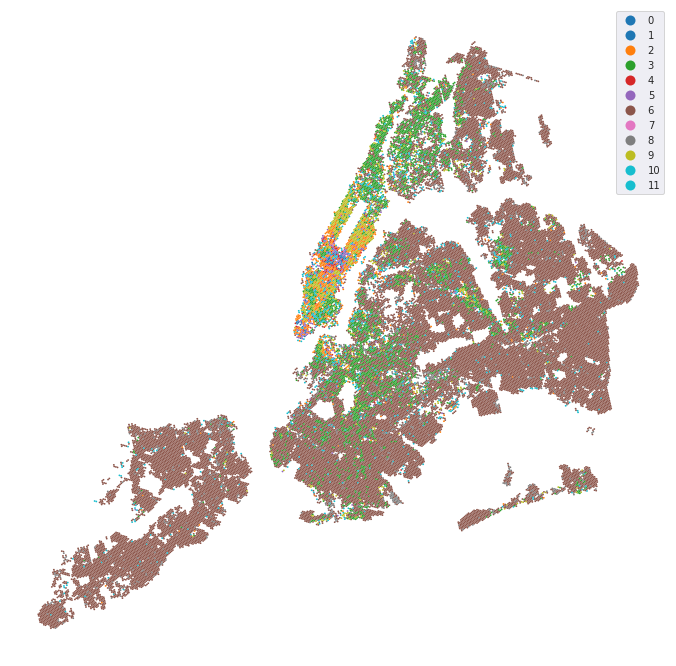

In [33]:
# Assign labels into a column
clean['agg'] = agg20.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(12, 12))
# Plot unique values choropleth including
# a legend and with no boundary lines
clean.plot(
    column='agg', categorical=True, legend=True, linewidth=0, ax=ax
    )
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()


In [388]:
bm = pd.read_csv('~/Downloads/cluster.csv')
# bm.h3.h3_to_geo_boundary()
gbm = gpd.GeoDataFrame(bm.set_index('hexcode').h3.h3_to_geo_boundary())
clean

,h3_10,BldgArea,YearBuilt,AssessTot,ResArea,lat,lon,cluster,geometry,agg
0,8a2a10000287fff,4456,1947.500000,52020.0,4456,40.850429,-73.783794,1,"POLYGON ((-73.78351 40.85107, -73.78442 40.850...",2
1,8a2a1000028ffff,596,1932.500000,82350.0,396,40.849303,-73.783448,1,"POLYGON ((-73.78316 40.84994, -73.78408 40.849...",2
2,8a2a10000297fff,41770,1862.739130,76500.0,37233,40.850768,-73.785337,1,"POLYGON ((-73.78505 40.85141, -73.78597 40.851...",2
3,8a2a1000029ffff,20394,1808.000000,693450.0,18034,40.849642,-73.784992,1,"POLYGON ((-73.78471 40.85028, -73.78562 40.850...",2
4,8a2a100002b7fff,19656,2003.000000,406140.0,19656,40.851554,-73.784139,1,"POLYGON ((-73.78386 40.85219, -73.78477 40.852...",2
...,...,...,...,...,...,...,...,...,...,...
35118,8a2a10776d67fff,109079,1765.657143,1144800.0,90296,40.675984,-74.011529,1,"POLYGON ((-74.01125 40.67662, -74.01216 40.676...",2
35119,8a2a10776d6ffff,86838,1811.333333,612968.0,56323,40.674861,-74.011179,1,"POLYGON ((-74.01090 40.67550, -74.01181 40.675...",2
35120,8a2a10776d77fff,130337,1596.100000,1272150.0,106922,40.676319,-74.013068,1,"POLYGON ((-74.01279 40.67696, -74.01370 40.676...",2
35121,8a2a10776d87fff,111265,1920.000000,4233150.0,0,40.677660,-74.019227,1,"POLYGON ((-74.01895 40.67830, -74.01986 40.678...",2


In [390]:
# gbm2 = gbm.reset_index()
# gbm['lat'], gbm['lon'] = zip(*gbm2['hexcode'].apply(h3_to_geo))
# gbm = gbm[(gbm['lon'] < -74.3) | (gbm['lat'] > 41)]
# gbm.to_csv('~/Downloads/gbm.csv', index=False)

In [34]:
# _, ax = plt.subplots(1, figsize=(30, 30))
# gbm.plot(
#     column='cluster', linewidth=0, ax=ax
#     )
#
# ax.set_axis_off()
# # Display the map
# plt.show()

In [35]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage='ward', connectivity=w2.sparse, n_clusters=5
    )
# Fit algorithm to the data
model.fit(db_scaled)

/home/thowe/anaconda3/envs/plz-gpu/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:279: UserWarning: the number of connected components of the connectivity matrix is 89 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<34857x34857 sparse matrix of type '<class 'numpy.float64'>'
	with 186032 stored elements in Compressed Sparse Row format>,
                        n_clusters=5)

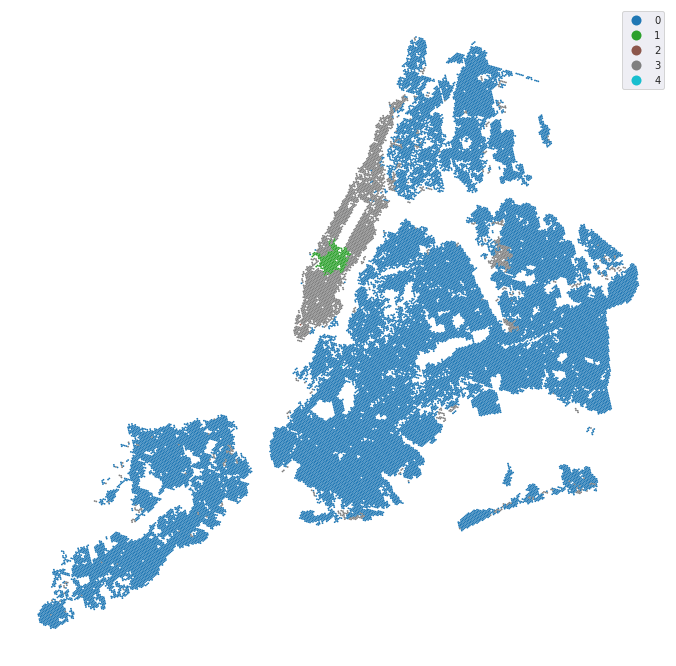

In [36]:
clean['ward5wq'] = model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(12, 12))
# Plot unique values choropleth including a legend and with no boundary lines
clean.plot(column='ward5wq', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [ ]:
# Assign labels into a column
clean['agg'] = agg20.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(12, 12))
# Plot unique values choropleth including
# a legend and with no boundary lines
clean.plot(
    column='agg', categorical=True, legend=True, linewidth=0, ax=ax
    )
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()
